In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

## Датасет музыкальных композиций

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, accuracy_score

# Максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', 13)
# Максимальное количество отображаемых строк
pd.set_option('display.max_rows', 10)
# Максимальная ширина столбца
pd.set_option('display.max_colwidth', 45)
# Максимальная ширина отображения
pd.set_option('display.width', 80)

In [3]:
df = pd.read_csv("light_music.csv")
df_train, df_test = train_test_split(df, train_size=0.8, random_state=1)
y_train, y_test = df_train['popularity'], df_test['popularity']
df_train.drop(columns='popularity', inplace=True)
df_test.drop(columns='popularity', inplace=True)
df_train

,duration_ms,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1233,195456,False,0.648,0.473,0,-14.604,...,0.917000,0.136,0.363,112.998,4,electro
1056,176561,False,0.723,0.809,7,-3.081,...,0.001230,0.565,0.274,98.007,4,electro
1686,185474,False,0.568,0.669,2,-5.698,...,0.000000,0.115,0.405,149.969,4,electro
187,205280,False,0.736,0.722,10,-5.908,...,0.000074,0.137,0.448,112.921,4,blues
3840,160801,False,0.533,0.930,1,-4.208,...,0.000000,0.790,0.435,92.591,4,punk-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,157648,False,0.480,0.369,7,-8.766,...,0.000000,0.100,0.548,159.687,4,pop
2763,245016,False,0.531,0.790,10,-7.213,...,0.000000,0.301,0.339,79.942,4,pop
905,237659,False,0.429,0.575,3,-7.626,...,0.003530,0.102,0.155,139.965,4,blues
3980,235253,False,0.481,0.715,11,-4.729,...,0.000000,0.243,0.818,135.802,4,punk-rock


In [4]:
Enc = OrdinalEncoder()
Enc.fit(df_train[['explicit', 'track_genre']])

OrdinalEncoder()

In [5]:
Enc.categories_

[array([False,  True]),
 array(['blues', 'electro', 'pop', 'punk-rock', 'spanish'], dtype=object)]

In [6]:
df_train[['explicit', 'track_genre']] = Enc.transform(df_train[['explicit', 'track_genre']])
df_test[['explicit', 'track_genre']] = Enc.transform(df_test[['explicit', 'track_genre']])

In [7]:
df_train

,duration_ms,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1233,195456,0.0,0.648,0.473,0,-14.604,...,0.917000,0.136,0.363,112.998,4,1.0
1056,176561,0.0,0.723,0.809,7,-3.081,...,0.001230,0.565,0.274,98.007,4,1.0
1686,185474,0.0,0.568,0.669,2,-5.698,...,0.000000,0.115,0.405,149.969,4,1.0
187,205280,0.0,0.736,0.722,10,-5.908,...,0.000074,0.137,0.448,112.921,4,0.0
3840,160801,0.0,0.533,0.930,1,-4.208,...,0.000000,0.790,0.435,92.591,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,157648,0.0,0.480,0.369,7,-8.766,...,0.000000,0.100,0.548,159.687,4,2.0
2763,245016,0.0,0.531,0.790,10,-7.213,...,0.000000,0.301,0.339,79.942,4,2.0
905,237659,0.0,0.429,0.575,3,-7.626,...,0.003530,0.102,0.155,139.965,4,0.0
3980,235253,0.0,0.481,0.715,11,-4.729,...,0.000000,0.243,0.818,135.802,4,3.0


### 1 и 2 задания
Построение дерева и случайного леса под задачу регрессии:

In [8]:
TreeRegr = DecisionTreeRegressor(random_state=1)
TreeRegr.fit(df_train, y_train)
RanForRegr = RandomForestRegressor(random_state=1)
RanForRegr.fit(df_train, y_train)

RandomForestRegressor(random_state=1)

In [14]:
print(f'RMSE for tree: {mean_squared_error(y_test, TreeRegr.predict(df_test))**0.5}')
print(f'RMSE for random forest: {mean_squared_error(y_test, RanForRegr.predict(df_test))**0.5}')
print(f'Difference: {mean_squared_error(y_test, RanForRegr.predict(df_test))**0.5 - mean_squared_error(y_test, TreeRegr.predict(df_test))**0.5}')

RMSE for tree: 29.700319451538643
RMSE for random forest: 22.691988372811892
Difference: -7.008331078726751


In [28]:
depths = np.arange(1, 50, 3)
RMSEs = np.ones_like(depths)
for i in range(len(depths)):
    RanForRegr = RandomForestRegressor(random_state=1, max_depth=depths[i])
    RanForRegr.fit(df_train, y_train)
    RMSEs[i] = mean_squared_error(y_test, RanForRegr.predict(df_test))**0.5

Text(0.5, 1.0, 'RMSE for a different depth in a random forest')

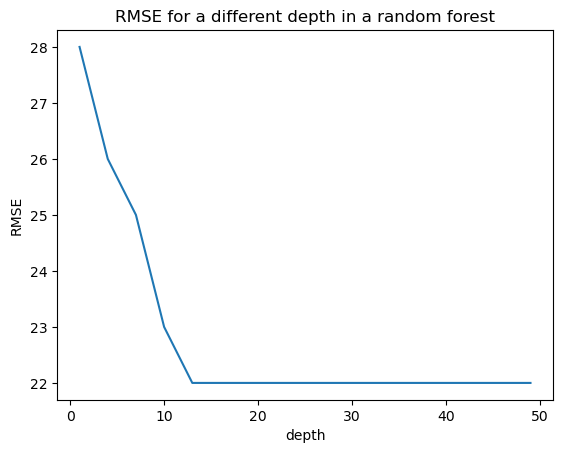

In [29]:
plt.plot(depths, RMSEs)
plt.xlabel('depth')
plt.ylabel('RMSE')
plt.title('RMSE for a different depth in a random forest')

### 3 и 4 задания
Построение дерева и случайного леса под задачу классификации:

In [10]:
y_train_bin = y_train.copy()
for i in range(len(y_train_bin)): y_train_bin.iloc[i] = 'True' if (y_train.iloc[i] > 50) else 'False'
y_test_bin = y_test.copy()
for i in range(len(y_test_bin)): y_test_bin.iloc[i] = 'True' if (y_test.iloc[i] > 50) else 'False'

In [11]:
print(f'Ratio of classes in y_train_bin: \n{y_train_bin.value_counts()} \n')
print(f'Ratio of classes in y_test_bin: \n{y_test_bin.value_counts()}')

Ratio of classes in y_train_bin: 
False    2373
True     1627
Name: popularity, dtype: int64 

Ratio of classes in y_test_bin: 
False    599
True     401
Name: popularity, dtype: int64


In [15]:
TreeClass = DecisionTreeClassifier(random_state=1, max_depth=17)
TreeClass.fit(df_train, y_train_bin)
RanForClass = RandomForestClassifier(random_state=1)
RanForClass.fit(df_train, y_train_bin)

RandomForestClassifier(random_state=1)

In [16]:
print(f'Accuracy for tree: {accuracy_score(y_test_bin, TreeClass.predict(df_test))}')
print(f'Accuracy for random forest: {accuracy_score(y_test_bin, RanForClass.predict(df_test))}')
print(f'Difference: {accuracy_score(y_test_bin, RanForClass.predict(df_test)) - accuracy_score(y_test_bin, TreeClass.predict(df_test))}')

Accuracy for tree: 0.698
Accuracy for random forest: 0.777
Difference: 0.07900000000000007


In [30]:
num_trees = np.arange(1, 150, 10)
accs = np.ones_like(num_trees, dtype='float')
for i in range(len(num_trees)):
    RanForClass = RandomForestClassifier(random_state=1, max_depth=17, n_estimators=num_trees[i])
    RanForClass.fit(df_train, y_train_bin)
    accs[i] = accuracy_score(y_test_bin, RanForClass.predict(df_test))

Text(0.5, 1.0, 'Accuracy for a different number of trees in a random forest')

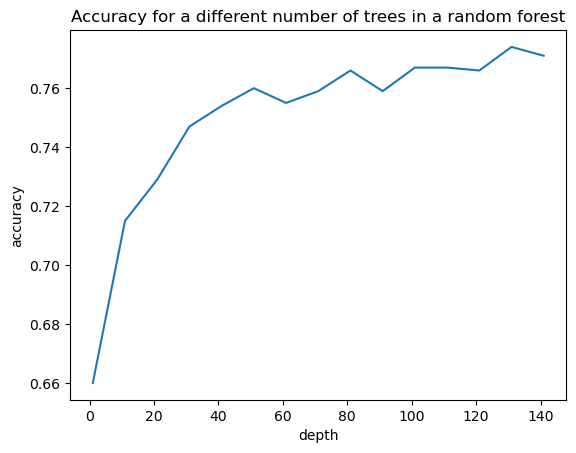

In [31]:
plt.plot(num_trees, accs)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('Accuracy for a different number of trees in a random forest')

### 5 и 6 задания
Создание функций bootstrap-а и RSM для создание собственного случайного леса:

In [32]:
np.random.seed(42)  # для фиксации случайности

def get_bootstrap(data, labels, n=100, max_samples=1.0):
    if isinstance(data, pd.DataFrame):  
        data = data.copy().values  # перевод таблицы в numpy array

    if isinstance(labels, pd.DataFrame) or isinstance(labels, pd.Series):
        labels = labels.copy().values  # перевод целевого признака в numpy array

    n_samples = round(len(data) * max_samples)  # подсчет кол-ва объектов в подвыборках
    bootstrap = []  # список для будущих подвыборок

    for i in range(n):

        sample_index = np.random.randint(0, len(data), n_samples)  # взятие случайных индексов в кол-ве n_samples
        b_data = data[sample_index]  # взятие объектов по выбранным индексам
        b_labels = labels[sample_index]  # взятие целевых значений по выбранным индексам

        bootstrap.append((b_data, b_labels))  # добавление в список подвыборок

    return bootstrap

def get_subsample(features, max_features=1.0):
    if not isinstance(features, np.ndarray):
        features = np.array(features.copy())  # перевод признаков в numpy array

    len_features = round(len(features) * max_features)  # подсчет кол-ва признаков в подвыборках
    sample_indexes = list(range(len(features)))  # получение списка индексов признаков

    subsample = np.random.choice(  # взятие случайных индексов признаков
        len(features),
        size=len_features,  # в кол-ве len_features
        replace=False  # без повторений
    )

    return features[subsample]  # на список выходе признаки

In [33]:
bootstrap = get_bootstrap(df_train, y_train_bin, n=3, max_samples=0.01)
np.unique(bootstrap[0][1], return_counts=True)

(array(['False', 'True'], dtype=object), array([28, 12], dtype=int64))

In [34]:
features_sample = get_subsample(df_train.keys(), max_features=0.1)
print(features_sample)

['time_signature' 'energy']


### 7 и 8 задания
Создание собственного случайного леса:

In [35]:
np.random.seed(42)  # для фиксации случайности

forest = []
bootstrap = get_bootstrap(df_train, y_train_bin, n=100, max_samples=0.5)  # получаем подвыборки

for b_data, b_labels in bootstrap:
    b_data = pd.DataFrame(b_data, columns=df_train.columns)  
    features = get_subsample(df_train.keys(), max_features=0.5)  # получаем признаки

    dt = DecisionTreeClassifier(random_state=1).fit(b_data[features], b_labels)
    forest.append(dt)

forest

[DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeClassifier(random_state=1),
 DecisionTreeCla

In [37]:
DecisionTreeClassifier.get_depth(forest[0])

21

In [38]:
# добавим предсказания всех деревьев в список
predictions = []
for tree in forest:
    predictions.append(tree.predict(df_test[tree.feature_names_in_]))

# сформируем список с предсказаниями для каждого объекта
predictions_per_object = list(zip(*predictions))

# выберем в качестве итогового предсказания для каждого объекта тот класс,
# за который проголосовало большинство деревьев
voted_predictions = []
for obj in predictions_per_object:
    voted_predictions.append('True' if obj.count('True') > obj.count('False') else 'False')

In [39]:
print(accuracy_score(y_test_bin, voted_predictions))

0.766
